In [1]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
back_path = "unet_data/back_simple"

back_list = []
for roots, dirs, files in os.walk(back_path):
    for each in files:
        if each.find('checkpoint') == -1:
            back_list.append(os.path.join(roots, each))

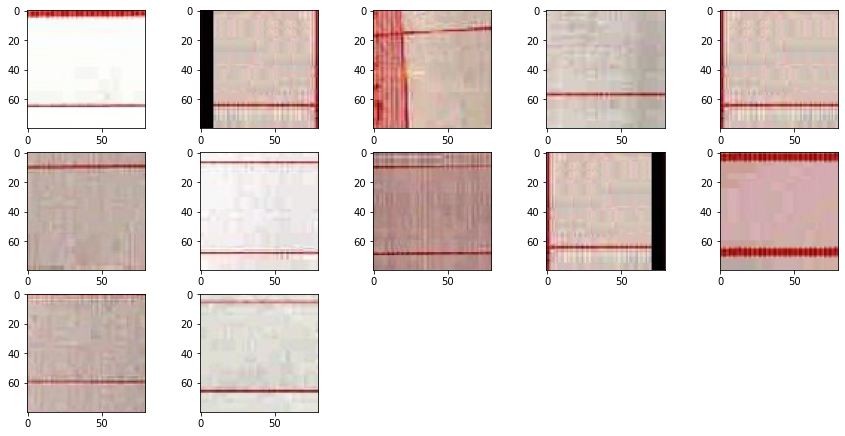

In [3]:
plt.figure(figsize=(15,10))
for i, back in enumerate(back_list):
    img = cv2.imread(back)[:,:,::-1]
    plt.subplot(4, 5, i+1)
    plt.imshow(img)

In [4]:
data_path = "./cleaned_data"

x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    for each in files:
        if each.find('checkpoint') == -1:
            x_data_list.append(os.path.join(roots, each))
            y_data_list.append(roots.split("/")[-1])
data = pd.DataFrame({'file':x_data_list, 'class':y_data_list})

In [5]:
def gen_unet(output_path, shuffle_data, mode):
    for i in tqdm(range(18000)):
        # get color
        r = random.choice([0,9,14,20,30,40,50,80,100])
        g = random.choice([0,9,14,20,30,40,50,80,100])
        b = random.choice([0,11,25,34,56,80,90,100,120,150,200,255])
        pen_color = (r,g,b) 
        idx = np.random.randint(0, 30, 2)
        alpha = np.random.randint(5, 9, 1)/10
        img_gray = cv2.imread(shuffle_data.iloc[i]['file'], 0)
        label_img = np.zeros((80, 80), dtype='uint8')
        label_img[idx[0]:idx[0]+50, idx[1]:idx[1]+50] = (img_gray-255)*255
        back_img = cv2.imread(back_list[i%12], 1)[:,:,::-1]
        back_img[label_img==255] = (1-alpha)*back_img[label_img==255] + alpha*np.ones_like(back_img[label_img==255])*pen_color
        cv2.imwrite(output_path + '/' + 'images/' + mode + str(i) + '.jpg', back_img[:,:,::-1])
        cv2.imwrite(output_path + '/' + 'labels/' + mode + str(i) + '.jpg', label_img)

In [6]:
output_path = 'unet_data'
shuffle_data = shuffle(data, random_state=2021)
mode = 'train/train/'
gen_unet(output_path, shuffle_data, mode)

100%|██████████| 18000/18000 [00:19<00:00, 944.39it/s] 


In [29]:
gen_path = "unet_data/images/train/train"

gen_list = []
for roots, dirs, files in os.walk(gen_path):
    for each in files:
        if each.find('checkpoint') == -1:
            gen_list.append(os.path.join(roots, each))

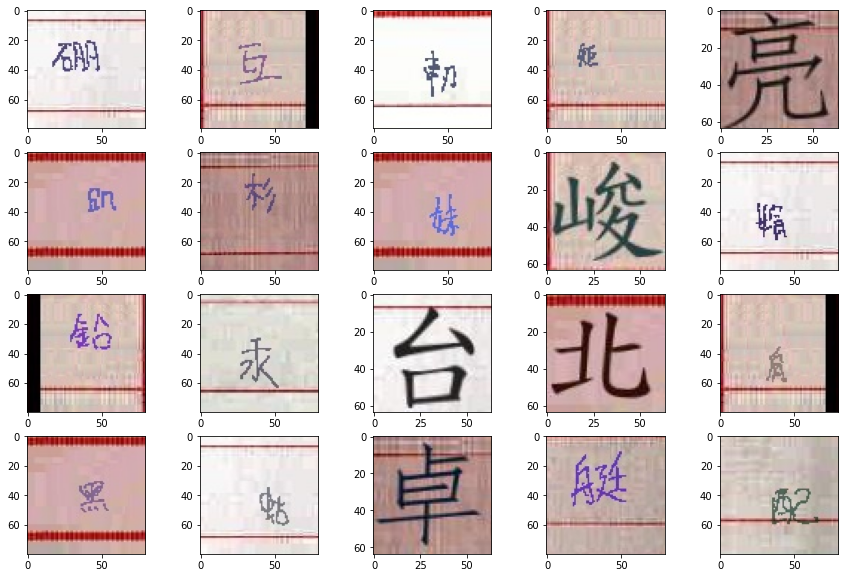

In [27]:
plt.figure(figsize=(15,10))
for i, gen in enumerate(gen_list[40:60]):
    img = cv2.imread(gen)[:,:,::-1]
    plt.subplot(4, 5, i+1)
    plt.imshow(img)

In [18]:
label_path = "unet_data/labels/train/train"

label_list = []
for roots, dirs, files in os.walk(label_path):
    for each in files:
        if each.find('checkpoint') == -1:
            label_list.append(os.path.join(roots, each))

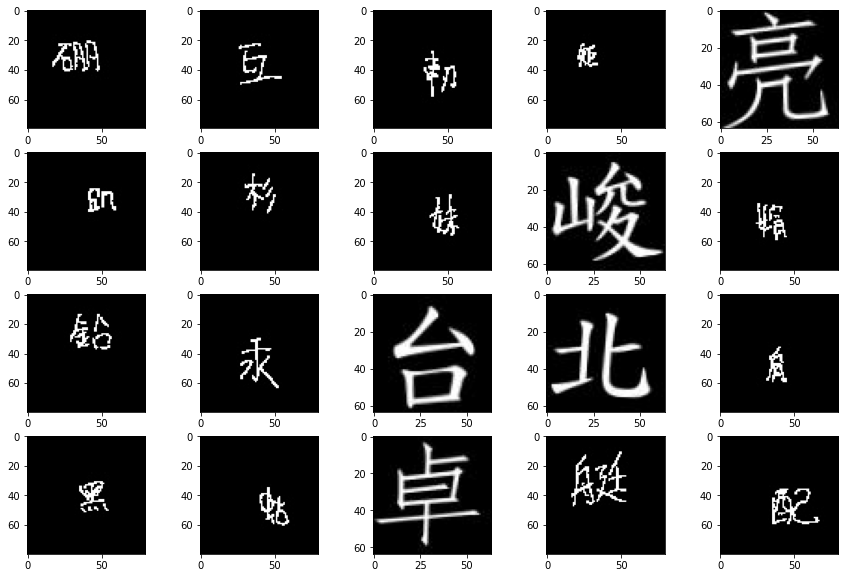

In [28]:
plt.figure(figsize=(15,10))
for i, label in enumerate(label_list[40:60]):
    img = cv2.imread(label)[:,:,::-1]
    plt.subplot(4, 5, i+1)
    plt.imshow(img)